# Important Modules to be used

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# For feature selection we need to import the dataset

In [20]:
df_data = pd.read_excel("ANZ_dataset2.xlsx")
df_data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [21]:
df_data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [22]:
df_data.shape

(12043, 23)

In [23]:
df_data.size

276989

In [24]:
df_data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

## Selecting important features for the operation

In [39]:
features_data = df_data[['customer_id','age','txn_description','balance','amount']]

In [40]:
features_data

,customer_id,age,txn_description,balance,amount
0,CUS-2487424745,26,POS,35.39,16.25
1,CUS-2487424745,26,SALES-POS,21.20,14.19
2,CUS-2142601169,38,POS,5.71,6.42
3,CUS-1614226872,40,SALES-POS,2117.22,40.90
4,CUS-2487424745,26,SALES-POS,17.95,3.25
...,...,...,...,...,...
12038,CUS-55310383,30,POS,14054.14,9.79
12039,CUS-2688605418,20,SALES-POS,9137.79,63.87
12040,CUS-2663907001,28,POS,45394.57,43.96
12041,CUS-1388323263,69,SALES-POS,11350.67,30.77


In [41]:
features_data.head()

,customer_id,age,txn_description,balance,amount
0,CUS-2487424745,26,POS,35.39,16.25
1,CUS-2487424745,26,SALES-POS,21.20,14.19
2,CUS-2142601169,38,POS,5.71,6.42
3,CUS-1614226872,40,SALES-POS,2117.22,40.90
4,CUS-2487424745,26,SALES-POS,17.95,3.25


In [42]:
# Printing unique positons in the office from txn_descriptions:----

features_data['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [55]:
plot_data= features_data.groupby(["customer_id"]).mean().reset_index()
plot_data.head()

,customer_id,age,balance,amount
0,CUS-1005756958,53,2275.852055,222.862603
1,CUS-1117979751,21,9829.929000,339.843700
2,CUS-1140341822,28,5699.212250,212.632500
3,CUS-1147642491,34,9032.841186,245.600169
4,CUS-1196156254,34,22272.433755,147.145796


In [56]:
# Mean Salary of each customer:-


In [57]:
sal = df_data[features_data['txn_description']=='PAY/SALARY'].groupby("customer_id").mean().reset_index()

sal = sal[['customer_id','amount']]
sal = sal.rename(columns ={'amount':'salary'})

In [58]:
sal.head()

,customer_id,salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73


In [59]:
# Creating plots to figure out the relations btw existing data 

In [60]:
plot_data = pd.merge(plot_data,sal, on='customer_id')
plot_data.head()


,customer_id,age,balance,amount,salary
0,CUS-1005756958,53,2275.852055,222.862603,970.47
1,CUS-1117979751,21,9829.929000,339.843700,3578.65
2,CUS-1140341822,28,5699.212250,212.632500,1916.51
3,CUS-1147642491,34,9032.841186,245.600169,1711.39
4,CUS-1196156254,34,22272.433755,147.145796,3903.73


In [61]:
# Salary vs Age 

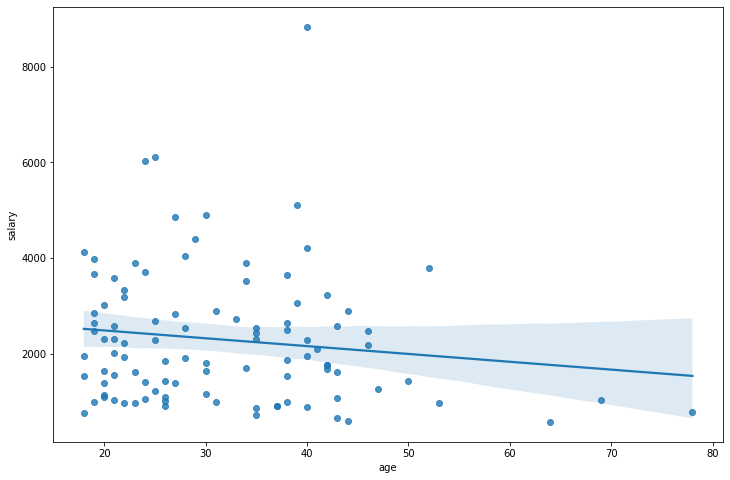

In [62]:
plt.figure(figsize = (12,8))
sns.regplot("age",'salary',data = plot_data)

In [63]:
# Salary vs Account Balance 

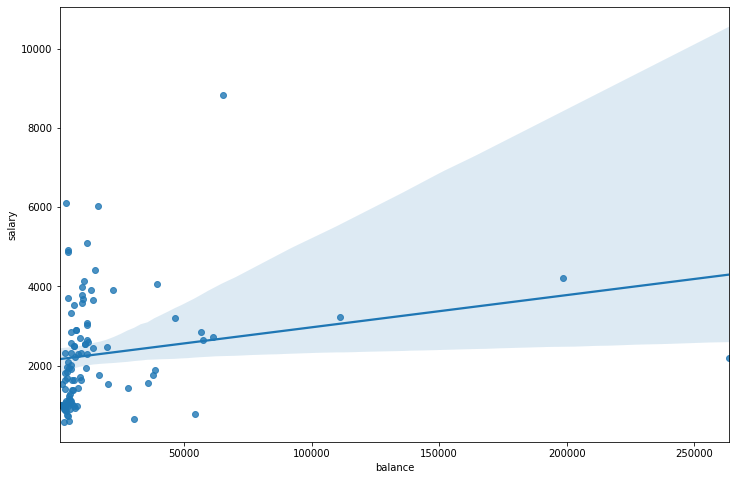

In [64]:
plt.figure(figsize=(12,8))
sns.regplot('balance','salary',fit_reg=True,data=plot_data)

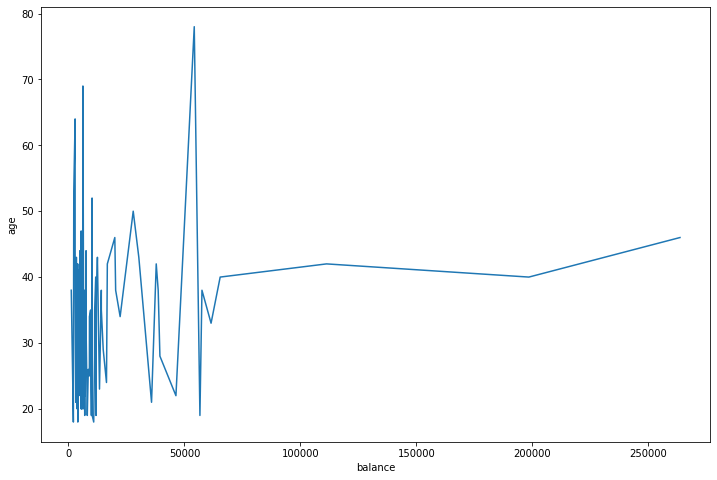

In [66]:
plt.figure(figsize=(12,8))
sns.lineplot('balance','age',data=plot_data)

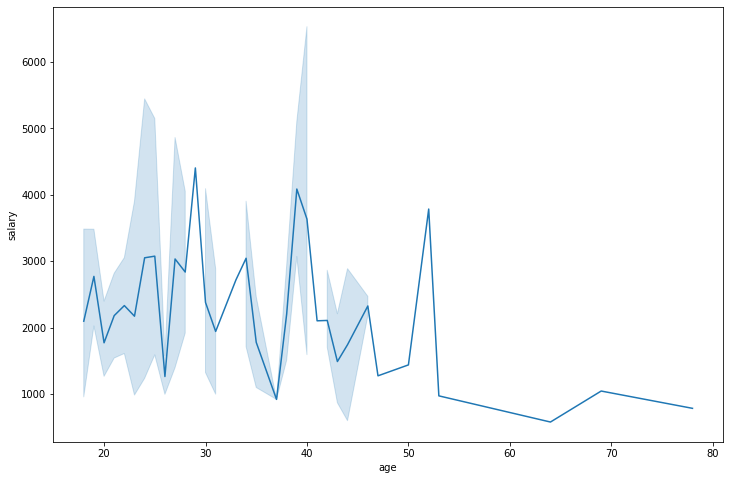

In [67]:
plt.figure(figsize=(12,8))
sns.lineplot('age','salary',data=plot_data)

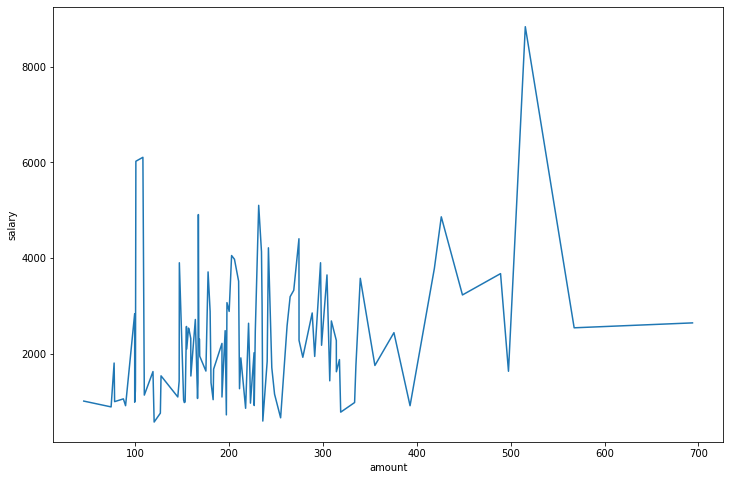

In [70]:
plt.figure(figsize=(12,8))
sns.lineplot('amount','salary',data=plot_data)

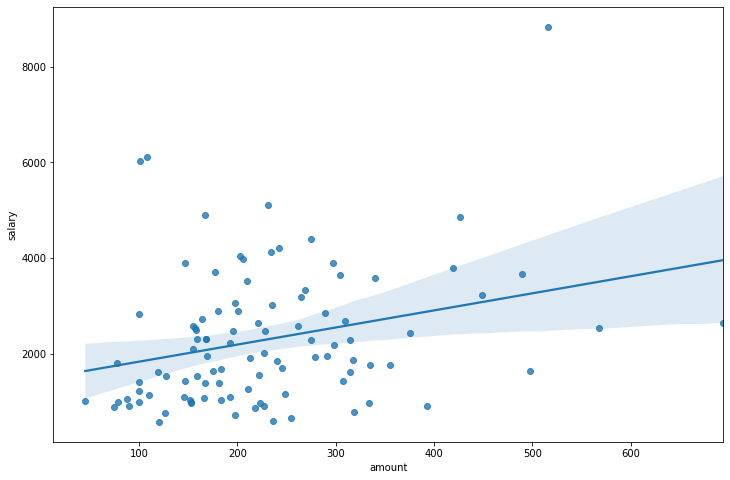

In [73]:
plt.figure(figsize=(12,8))
sns.regplot('amount','salary',fit_reg = True,data=plot_data)

# Feature Engineering

In [74]:
# Mean (POS) for each customer:---

In [75]:
pos = features_data[features_data['txn_description'] == ("POS" or "SALES-POS")].groupby("customer_id").mean().reset_index()

pos = pos[['customer_id','amount']]

pos = pos.rename(columns={'amount':'salary'})

In [77]:
pos.head()

,customer_id,salary
0,CUS-1005756958,28.769615
1,CUS-1117979751,23.321923
2,CUS-1140341822,34.781282
3,CUS-1147642491,54.271316
4,CUS-1196156254,31.157432


In [78]:
len(pos)

100

In [79]:
pos.size

200

In [80]:
pos.shape

(100, 2)

In [81]:
# Mean payment paid by the customer:--

In [93]:
payment_mean = features_data[features_data['txn_description'] == 'PAYMENT'].groupby("customer_id").mean().reset_index()
payment_mean = payment_mean[['customer_id','amount']]
payment_mean = payment_mean.rename(columns ={'amount':'payment'})

In [94]:
payment_mean.head(10)

,customer_id,payment
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000
5,CUS-1220154422,72.750000
6,CUS-1233833708,330.428571
7,CUS-1271030853,88.227273
8,CUS-127297539,69.000000
9,CUS-134193016,193.000000


In [95]:
len(payment_mean)


100

In [96]:
payment_mean.shape

(100, 2)

In [97]:
payment_mean.size

200

In [98]:
# mean phone transactions made my by the customer:-

phone_bank = features_data[features_data['txn_description'] == 'PHONE BANK'].groupby('customer_id').mean().reset_index()

phone_bank = phone_bank[['customer_id','amount']]
phone_bank = phone_bank.rename(columns={'amount':'phonebank'})
phone_bank.head(10)

,customer_id,phonebank
0,CUS-1005756958,182.0
1,CUS-1646183815,150.0
2,CUS-1896554896,1916.0
3,CUS-2155701614,82.0
4,CUS-2348881191,1629.0
5,CUS-2376382098,177.0
6,CUS-261674136,43.0
7,CUS-3151318058,36.0
8,CUS-3180318393,67.0
9,CUS-326006476,158.0


In [99]:
len(phone_bank)

16

In [100]:
phone_bank.shape

(16, 2)

In [101]:
# Merging revelant dataframes

customer=features_data.groupby("customer_id").mean().reset_index()
customer=customer[["customer_id","age","balance"]]
customer.head()

,customer_id,age,balance
0,CUS-1005756958,53,2275.852055
1,CUS-1117979751,21,9829.929000
2,CUS-1140341822,28,5699.212250
3,CUS-1147642491,34,9032.841186
4,CUS-1196156254,34,22272.433755


In [102]:
data = pd.merge(customer,payment_mean,on='customer_id')

data = pd.merge(data , pos , on='customer_id')

data = pd.merge(data, sal , on = 'customer_id')

data.head()

,customer_id,age,balance,payment,salary_x,salary_y
0,CUS-1005756958,53,2275.852055,144.000000,28.769615,970.47
1,CUS-1117979751,21,9829.929000,98.925000,23.321923,3578.65
2,CUS-1140341822,28,5699.212250,142.000000,34.781282,1916.51
3,CUS-1147642491,34,9032.841186,96.185185,54.271316,1711.39
4,CUS-1196156254,34,22272.433755,43.100000,31.157432,3903.73


In [103]:
# Feature Selection for new features :-

# Payment vs Salary

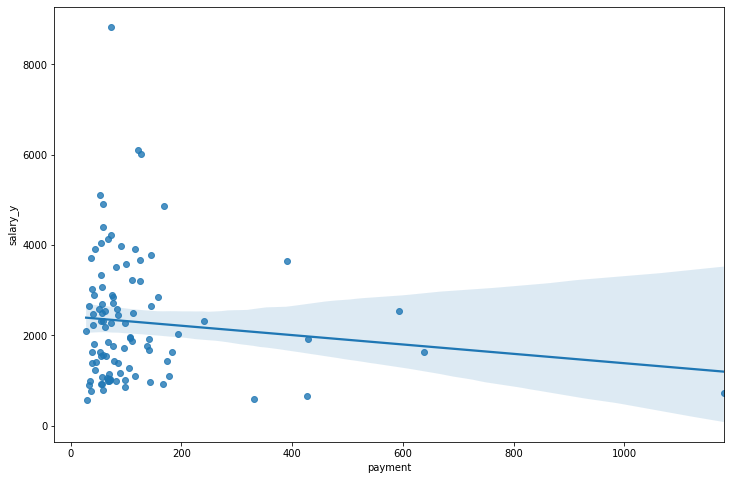

In [106]:
plt.figure(figsize=(12,8))

sns.regplot('payment','salary_y',fit_reg = True , data = data)

In [107]:
# SALARY VS POS 

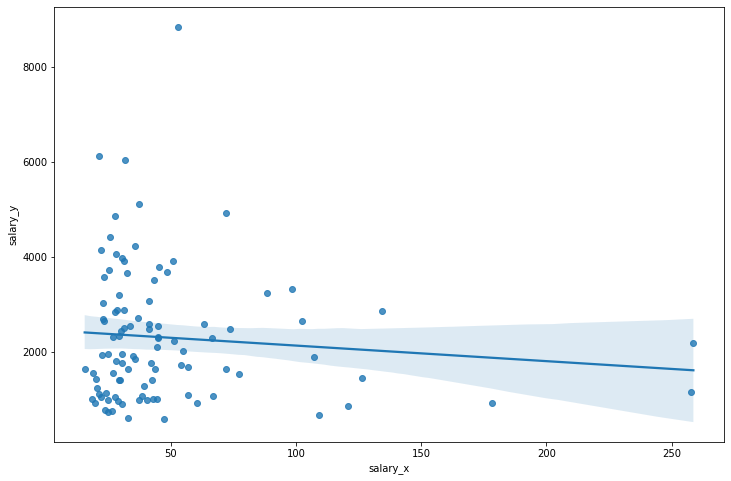

In [108]:
plt.figure(figsize = (12,8))

sns.regplot("salary_x",'salary_y', fit_reg = True , data = data)

# PREDICTIVE ANALYSIS

## Linear Regression Model

In [109]:
# X AND Y OF MACHINE LEARNING:-

X = data[['age','balance','payment','salary_x']].values
y = data['salary_y'].values


In [110]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,
                                                      random_state = 42)

In [111]:
lreg = LinearRegression()

In [113]:
lreg.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
y_pred = lreg.predict(X_test)

In [115]:
# r2_score

print("coefficient of determination", r2_score(y_test , y_pred))

coefficient of determination 0.07666219584715894


In [116]:
# Sample prediction values

In [117]:
print("the model predicts salary will be:")
print(lreg.predict([[60,5000,100,50]]) [0])

the model predicts salary will be:
1467.1295983855503


## Decision Tree Regressor

In [119]:
dtree = DecisionTreeRegressor()

In [120]:
dtree.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [122]:
dtree.score(X_train ,y_train)

1.0

In [123]:
dtree.predict(X_test)

array([1272.47, 2639.76, 3517.61, 2218.73, 3071.14, 3649.51, 2840.15,
        917.45, 2280.36, 1272.47,  576.  , 2500.  , 3026.95, 2639.76,
       3676.94, 2718.51, 2023.68, 3676.94, 2572.91, 3517.61])

In [124]:
# Scores using X and Y values for Decission tree

dtree.score(X_test, y_test)

0.20134458291706314

In [125]:
# Sample prediction values:-

In [126]:
print("model's predicted salary will be:")
print(dtree.predict([[60,5000,100,60]])[0])

model's predicted salary will be:
1043.1199999999994


## K- means clustering

In [127]:
data

,customer_id,age,balance,payment,salary_x,salary_y
0,CUS-1005756958,53,2275.852055,144.000000,28.769615,970.47
1,CUS-1117979751,21,9829.929000,98.925000,23.321923,3578.65
2,CUS-1140341822,28,5699.212250,142.000000,34.781282,1916.51
3,CUS-1147642491,34,9032.841186,96.185185,54.271316,1711.39
4,CUS-1196156254,34,22272.433755,43.100000,31.157432,3903.73
...,...,...,...,...,...,...
95,CUS-72755508,35,4497.557069,1180.000000,25.022143,725.32
96,CUS-809013380,21,3756.902903,70.136364,22.255098,1037.07
97,CUS-860700529,30,3462.276009,41.933333,28.164845,1808.62
98,CUS-880898248,26,8528.830385,77.500000,20.101429,1433.98


In [128]:
X = data[['age','balance','payment','salary_x']]
X.shape, X.size

((100, 4), 400)

In [129]:
wc = []

for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit(X)
    wc.append(km.inertia_)

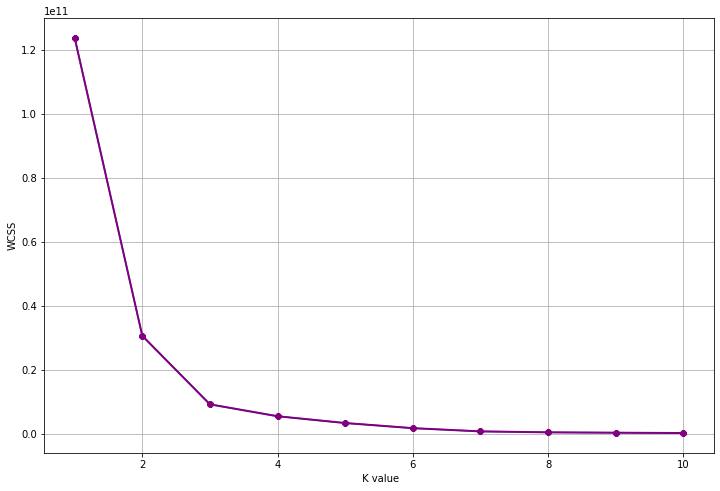

In [130]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wc)
plt.grid()
plt.plot(range(1,11),wc,
        linewidth = 2,
        color= 'purple',
        marker = '8')
plt.xlabel(" K value")
plt.ylabel("WCSS")
plt.show()

In [131]:
km = KMeans(n_clusters = 4)
clusters = km.fit_predict(X)
data['label'] = clusters

In [132]:
data

,customer_id,age,balance,payment,salary_x,salary_y,label
0,CUS-1005756958,53,2275.852055,144.000000,28.769615,970.47,0
1,CUS-1117979751,21,9829.929000,98.925000,23.321923,3578.65,0
2,CUS-1140341822,28,5699.212250,142.000000,34.781282,1916.51,0
3,CUS-1147642491,34,9032.841186,96.185185,54.271316,1711.39,0
4,CUS-1196156254,34,22272.433755,43.100000,31.157432,3903.73,0
...,...,...,...,...,...,...,...
95,CUS-72755508,35,4497.557069,1180.000000,25.022143,725.32,0
96,CUS-809013380,21,3756.902903,70.136364,22.255098,1037.07,0
97,CUS-860700529,30,3462.276009,41.933333,28.164845,1808.62,0
98,CUS-880898248,26,8528.830385,77.500000,20.101429,1433.98,0


In [134]:
print("The first group:")
print(" ")
print(data[data['label'] ==0])

The first group:
 
       customer_id  age       balance      payment   salary_x  salary_y  label
0   CUS-1005756958   53   2275.852055   144.000000  28.769615    970.47      0
1   CUS-1117979751   21   9829.929000    98.925000  23.321923   3578.65      0
2   CUS-1140341822   28   5699.212250   142.000000  34.781282   1916.51      0
3   CUS-1147642491   34   9032.841186    96.185185  54.271316   1711.39      0
4   CUS-1196156254   34  22272.433755    43.100000  31.157432   3903.73      0
..             ...  ...           ...          ...        ...       ...    ...
95    CUS-72755508   35   4497.557069  1180.000000  25.022143    725.32      0
96   CUS-809013380   21   3756.902903    70.136364  22.255098   1037.07      0
97   CUS-860700529   30   3462.276009    41.933333  28.164845   1808.62      0
98   CUS-880898248   26   8528.830385    77.500000  20.101429   1433.98      0
99   CUS-883482547   19   9877.452697    91.446809  30.635098   3977.46      0

[85 rows x 7 columns]


In [136]:
print("THE SECOND GROUP:\n")
print(data[data['label'] == 0])

THE SECOND GROUP:

       customer_id  age       balance      payment   salary_x  salary_y  label
0   CUS-1005756958   53   2275.852055   144.000000  28.769615    970.47      0
1   CUS-1117979751   21   9829.929000    98.925000  23.321923   3578.65      0
2   CUS-1140341822   28   5699.212250   142.000000  34.781282   1916.51      0
3   CUS-1147642491   34   9032.841186    96.185185  54.271316   1711.39      0
4   CUS-1196156254   34  22272.433755    43.100000  31.157432   3903.73      0
..             ...  ...           ...          ...        ...       ...    ...
95    CUS-72755508   35   4497.557069  1180.000000  25.022143    725.32      0
96   CUS-809013380   21   3756.902903    70.136364  22.255098   1037.07      0
97   CUS-860700529   30   3462.276009    41.933333  28.164845   1808.62      0
98   CUS-880898248   26   8528.830385    77.500000  20.101429   1433.98      0
99   CUS-883482547   19   9877.452697    91.446809  30.635098   3977.46      0

[85 rows x 7 columns]


In [137]:
print("The third GROUP: \n")
print(data[data['label'] == 0])

The third GROUP: 

       customer_id  age       balance      payment   salary_x  salary_y  label
0   CUS-1005756958   53   2275.852055   144.000000  28.769615    970.47      0
1   CUS-1117979751   21   9829.929000    98.925000  23.321923   3578.65      0
2   CUS-1140341822   28   5699.212250   142.000000  34.781282   1916.51      0
3   CUS-1147642491   34   9032.841186    96.185185  54.271316   1711.39      0
4   CUS-1196156254   34  22272.433755    43.100000  31.157432   3903.73      0
..             ...  ...           ...          ...        ...       ...    ...
95    CUS-72755508   35   4497.557069  1180.000000  25.022143    725.32      0
96   CUS-809013380   21   3756.902903    70.136364  22.255098   1037.07      0
97   CUS-860700529   30   3462.276009    41.933333  28.164845   1808.62      0
98   CUS-880898248   26   8528.830385    77.500000  20.101429   1433.98      0
99   CUS-883482547   19   9877.452697    91.446809  30.635098   3977.46      0

[85 rows x 7 columns]


In [138]:
print("the fourth group:\n")
print(data[data['label'] == 0])

the fourth group:

       customer_id  age       balance      payment   salary_x  salary_y  label
0   CUS-1005756958   53   2275.852055   144.000000  28.769615    970.47      0
1   CUS-1117979751   21   9829.929000    98.925000  23.321923   3578.65      0
2   CUS-1140341822   28   5699.212250   142.000000  34.781282   1916.51      0
3   CUS-1147642491   34   9032.841186    96.185185  54.271316   1711.39      0
4   CUS-1196156254   34  22272.433755    43.100000  31.157432   3903.73      0
..             ...  ...           ...          ...        ...       ...    ...
95    CUS-72755508   35   4497.557069  1180.000000  25.022143    725.32      0
96   CUS-809013380   21   3756.902903    70.136364  22.255098   1037.07      0
97   CUS-860700529   30   3462.276009    41.933333  28.164845   1808.62      0
98   CUS-880898248   26   8528.830385    77.500000  20.101429   1433.98      0
99   CUS-883482547   19   9877.452697    91.446809  30.635098   3977.46      0

[85 rows x 7 columns]
